In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv("zuu crew scores.csv")
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [181]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [182]:
X = np.column_stack([df['TotalHours'].values, df['Attendance'].values, df['AssignmentsCompleted'].values, df['GitHubScore'].values]).reshape(-1, 4)
Y = df['CapstoneScore'].values

In [183]:
def compute_cost(X, Y, beta):
    m = len(Y)
    y_hat = X.dot(beta)
    cost = (1/(2*m)) * np.sum((y_hat - Y) ** 2)

    return cost

In [184]:
X_with_bias = np.column_stack([np.ones((len(X))), X])
X_with_bias

array([[ 1. , 43.7, 79.9,  2. , 62.8],
       [ 1. , 95.6, 76.8,  6. , 87.4],
       [ 1. , 75.9, 96.6,  8. , 98.4],
       [ 1. , 24. , 83.2,  6. , 41.8],
       [ 1. , 88. , 86.5,  5. , 23.9],
       [ 1. , 97.3, 76.6,  6. , 29.6],
       [ 1. , 26.5, 83.8,  3. , 98.8],
       [ 1. , 57.2, 90. ,  5. , 38.4],
       [ 1. , 48.9, 68.4,  9. , 68. ],
       [ 1. , 36.2, 95.9,  3. , 21.8],
       [ 1. , 65.1, 68.2,  4. , 95. ],
       [ 1. , 22.6, 67.6,  2. , 78.6],
       [ 1. , 36.3, 61.5,  2. ,  8.9],
       [ 1. , 51. , 82.6,  6. , 87.9],
       [ 1. , 56.3, 78.1,  2. , 61.3],
       [ 1. , 15.9, 66.2,  4. , 65. ],
       [ 1. , 96.9, 94.5,  2. , 51.3],
       [ 1. , 18.8, 70.8,  4. , 22. ],
       [ 1. , 54.6, 66.2,  6. ,  5.8],
       [ 1. , 91.8, 86.4,  9. , 88.4],
       [ 1. , 69.6, 68.9, 10. , 99.5],
       [ 1. , 38.1, 69.2,  6. , 17.4],
       [ 1. , 26.6, 64.2,  6. , 69.6],
       [ 1. , 97.3, 92. , 10. , 15.4],
       [ 1. , 94.6, 86.1,  4. , 22.4],
       [ 1. , 27.6, 94.2,

In [185]:
beta = np.random.randn(5)
print(f"Initial beta parameters: {beta}")

Initial beta parameters: [-0.39163745  1.20609099  0.13197599 -1.04984931  0.91094146]


In [186]:
y_hat = X_with_bias.dot(beta)
y_hat

array([117.96684482, 198.36360411, 185.13739357,  71.3132053 ,
       133.68254651, 147.73514743, 129.48082928, 110.20551115,
       120.10874452,  72.63432918, 169.46568919, 105.28789535,
        57.51366888, 145.7928775 , 131.5596223 ,  82.53381693,
       173.58190802,  47.46808772,  73.18210534, 192.80882135,
       172.78562252,  64.24445289,  97.26567061, 132.6328117 ,
       141.27339376,  51.51848032,  71.80711465, 124.78225436,
       133.16564923, 115.55538503, 161.64216947, 101.25097714,
        62.34024287, 115.60878208, 157.68149027, 102.82984138,
       102.40250493,  82.48832647,  86.92717495, 157.6939242 ,
       151.13381338, 171.4642127 , 140.552829  , 160.17476312,
       124.58580437, 141.40766794,  76.51550722, 104.66608906,
       158.03020254,  57.16494004, 176.02130366,  61.1695245 ,
       136.90978806, 208.52717341, 111.38940871, 172.95358079,
       121.85859684, 146.98696384, 151.42083057, 189.94746624,
        22.55000619,  95.09753645, 120.45073856, 171.05

In [187]:
cost = compute_cost(X_with_bias, Y, beta)
print("Initial Cost:", cost)

Initial Cost: 2835.134351298956


In [188]:
def gradient_descent(X, Y, beta, lr, n_iter):
    m = len(Y)
    cost_history = []

    for i in range(n_iter):
        y_hat = X.dot(beta)

        gradients = (1 / m) * X.T.dot(y_hat - Y)

        beta = beta - lr * gradients

        cost = compute_cost(X, Y, beta)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"Iteration : {i}, Cost: {cost:.4f}")

    return beta, cost_history

In [189]:
lr = 0.00001
n_iter = 10000

beta, cost_history = gradient_descent(X_with_bias, Y, beta, lr, n_iter)

Iteration : 0, Cost: 2186.3364
Iteration : 1000, Cost: 16.8993
Iteration : 2000, Cost: 16.4204
Iteration : 3000, Cost: 16.0110
Iteration : 4000, Cost: 15.6540
Iteration : 5000, Cost: 15.3427
Iteration : 6000, Cost: 15.0712
Iteration : 7000, Cost: 14.8344
Iteration : 8000, Cost: 14.6280
Iteration : 9000, Cost: 14.4479


In [190]:
print(f"best beta : {beta}")

best beta : [-0.36399079  0.63864657  0.25292884 -0.51925092  0.04271805]


In [191]:
print(f"final cost : {cost_history[-1]}")

final cost : 14.290952681489529


In [192]:
y_hat = X_with_bias.dot(beta)
y_hat

array([49.39807048, 80.73360859, 72.59165885, 34.67731537, 76.13995897,
       79.29961856, 40.41837087, 57.97430723, 46.39772842, 46.38439153,
       60.44285917, 33.48654832, 37.71569218, 53.73831775, 56.92566831,
       27.23404855, 86.57557158, 28.41272   , 48.38226035, 79.21983375,
       60.57054463, 39.09890782, 32.71971039, 80.51112264, 80.70902865,
       40.43878363, 40.39516024, 39.53732742, 50.30719427, 36.78858282,
       84.35814434, 39.5555444 , 28.2723605 , 64.34788249, 67.25932712,
       66.62154594, 29.74177843, 41.58551609, 34.20527211, 63.07775411,
       60.25888004, 67.07332765, 58.80035568, 70.67019718, 51.68802202,
       53.77066131, 50.75913115, 34.83819626, 60.44333287, 35.84600893,
       72.55010964, 40.47655252, 49.48306492, 79.19617109, 64.96798398,
       78.98291846, 72.11285544, 62.08434869, 70.55330574, 70.96293598,
       21.75432395, 51.13419254, 45.9519269 , 78.62106572, 43.74646964,
       56.25811935, 70.59257294, 52.59364058, 78.82406583, 40.84

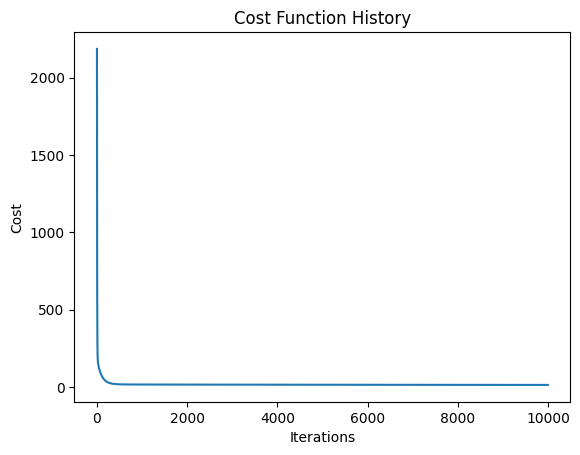

In [193]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()